In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import numpy as np
import math
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from Bio import SeqIO

sys.path.append('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/src')

from abundance_plots import AbundancePlotSettingsAndSave

colors = ["#8687d1", "#ff9900",  "#3b5c36"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

%matplotlib inline

fig_dir='/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/paper/contaminants'

# Coverage versus length

In [5]:
with open("/oak/stanford/groups/dpwall/unmapped_reads/reference_genomes/bacteria/all_seqs.fa") as f:
    seqs = [(record.description, len(record.seq)) for record in SeqIO.parse(f, "fasta")]

In [6]:
contig_df = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/ref_genome/contig_df.csv', index_col=0)
for df_bacteria in pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/results/paper/bacteria_abundance_data.csv', index_col=0,chunksize=10):
    break

In [10]:
full_names = [i for i,_ in seqs]

names = np.array([i.split('| ')[-1].split('|')[-1][:50].split(', ')[0] for i,_ in seqs])
names_according_to_df = [i.split('| ')[-1][:50].split(', ')[0] for i,_ in seqs]
lengths = [i for _,i in seqs]
cleaned_names = [(f+'.').split(' ctg')[0].split(' cont')[0].split(' chr')[0].split('contig')[0].split(
    ' NZ')[0].split(' ATCC')[0].split(' plasmid')[0].split(' genom')[0].split(' Cont')[0].split(
    ' gcontig')[0].split('con.')[0].split('co.')[0].split('gcont.')[0].split(' g.')[0].split(
    ' B_')[0].split('C_')[0].split('M_')[0].split(' R_')[0].split(' supercont')[0].split(' scaffold')[0].split(' .')[0].split('-.')[0].split(' clone')[0].
                 split('Cont.')[0].split('Co.')[0].split(' Scfld')[0].split('FA.')[0].split('_Co')[0] for f in names]
cleaned_names = [' '.join(f.replace('str ', '').replace('str. ','').replace(' sp.', '').replace(' subsp.', '').replace(' serovar', '').replace(' DSM', '').split(' ')[:3]) for f in cleaned_names]
cleaned_names = np.array([f[:-1] if f[-1]=='.' else f for f in cleaned_names])

# Fix one column that got weird with redownloading fasta file.
cleaned_names[np.where(cleaned_names=='Ralstonia solanacearum PSI07')[0][0]] = 'Ralstonia solanacearum PSI07.1'



In [11]:
df_bacteria_agg = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/bacteria_abundance_data_agg.csv', index_col=0, sep='\t')

In [12]:
# Verify same bacteria names are in aggregated dataframe AND cleaned names of fasta file.
set(df_bacteria_agg.columns).difference(set(cleaned_names))

{'batch', 'type'}

In [21]:
df = pd.DataFrame(cleaned_names, columns=['cleaned_name'])
df['lengths'] = lengths
total_lengths = df.groupby('cleaned_name').sum()
total_lengths = total_lengths.loc[df_bacteria_agg.columns[:-2]]
total_lengths

,lengths
'Nostoc azollae' 0708,5486145
AECQ01000002,1385
AECQ01000003,194024
AECQ01000004,181505
AECQ01000006,70815
...,...
Zasmidium cellare culture-collection,1708
Zunongwangia profunda SM-A87,5128187
Zygosaccharomyces rouxii CBS,9764635
Zymomonas mobilis mobilis,4323119


In [44]:
mean_reads = df_bacteria_agg.transpose()[:-2].apply(np.max, axis=1)
total_lengths['mean_reads'] = mean_reads


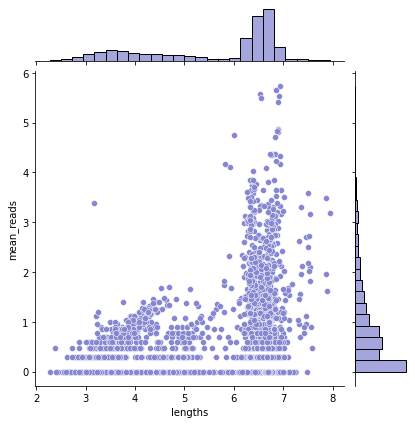

In [45]:
sns.jointplot(data=np.log10(total_lengths), x='lengths', y='mean_reads', marginal_kws=dict(bins=25))

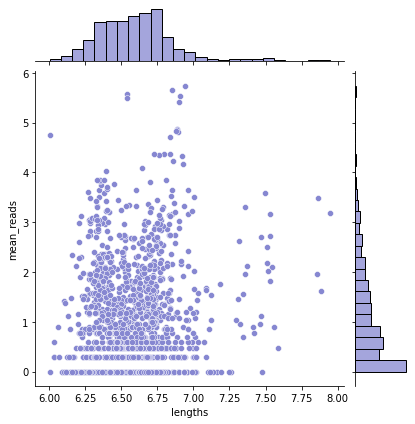

In [46]:
sns.jointplot(data=np.log10(total_lengths[total_lengths.lengths>1e6]), x='lengths', y='mean_reads', marginal_kws=dict(bins=25))